In [1]:
%pylab inline
from __future__ import print_function
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style("white")
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

Populating the interactive namespace from numpy and matplotlib


# Loading data

In [2]:
input = pd.read_csv('data/data.csv', index_col=0, parse_dates=True,date_parser=lambda a: pd.to_datetime(a, unit='s'))
input.columns = ['NO2-A', 'NO2-W', 'O3-A', 'O3-W', 'CO-A', 'CO-W', 'PT', 'NC']

In [3]:
input

,NO2-A,NO2-W,O3-A,O3-W,CO-A,CO-W,PT,NC
2015-11-10 18:17:00,38.094913,0.718772,352.073244,248.663839,242.944914,930.340892,316.290902,-0.187506
2015-11-10 18:17:20,59.658071,0.687521,359.979736,276.633442,232.007080,792.274178,316.197150,-0.187506
2015-11-10 18:17:40,85.596362,0.718772,361.073519,293.258950,224.288095,694.458693,315.978393,-0.187506
2015-11-10 18:18:00,108.690817,1.187536,365.229896,302.727988,228.913236,642.300852,315.697134,-0.187506
2015-11-10 18:18:20,129.910214,32.250984,378.105289,320.916044,224.756859,591.236793,315.540880,-0.187506
2015-11-10 18:18:40,143.629383,59.908078,380.011597,329.728813,215.725333,542.079043,315.540880,-0.187506
2015-11-10 18:19:00,153.223426,80.252449,383.761712,336.885281,213.506516,508.609271,315.353374,-0.187506
2015-11-10 18:19:20,166.801965,99.956175,384.996124,346.166814,221.147374,499.421491,315.165868,-0.171880
2015-11-10 18:19:40,176.911649,118.191107,387.761834,350.932585,223.709952,487.124241,315.072115,-0.171880
2015-11-10 18:20:00,183.318094,133.832209,388.183721,359.260964,222.491165,477.780206,315.087741,-0.171880


In [4]:
target = pd.read_csv('data/target.csv', index_col=0, parse_dates=True)
target.columns = ['CO-ppm', 'O3-ppm', 'NO-ppb', 'NO2-ppb', 'TEMP']

In [5]:
target

,CO-ppm,O3-ppm,NO-ppb,NO2-ppb,TEMP
Date,,,,,
2015-11-10 00:00:00,0.3,NaN,4.0,22.7,44.0
2015-11-10 00:01:00,0.4,NaN,15.4,23.3,43.6
2015-11-10 00:02:00,0.5,NaN,31.2,37.5,43.3
2015-11-10 00:03:00,0.8,NaN,32.6,33.5,43.3
2015-11-10 00:04:00,0.6,NaN,21.2,36.1,44.1
2015-11-10 00:05:00,0.4,NaN,3.2,23.9,44.4
2015-11-10 00:06:00,0.2,NaN,4.4,22.5,44.2
2015-11-10 00:07:00,0.4,NaN,22.3,33.9,43.7
2015-11-10 00:08:00,0.5,0.005,28.9,38.8,43.6


In [6]:
data = input.join(target).dropna()

In [7]:
X, y = data[input.columns], data[target.columns]

In [10]:
X

,NO2-A,NO2-W,O3-A,O3-W,CO-A,CO-W,PT,NC
2015-11-10 18:17:00,38.094913,0.718772,352.073244,248.663839,242.944914,930.340892,316.290902,-0.187506
2015-11-10 18:18:00,108.690817,1.187536,365.229896,302.727988,228.913236,642.300852,315.697134,-0.187506
2015-11-10 18:19:00,153.223426,80.252449,383.761712,336.885281,213.506516,508.609271,315.353374,-0.187506
2015-11-10 18:20:00,183.318094,133.832209,388.183721,359.260964,222.491165,477.780206,315.087741,-0.171880
2015-11-10 18:21:00,197.006012,151.301492,388.043092,352.604511,195.927854,406.059267,315.587756,-0.171880
2015-11-10 18:22:00,204.521867,162.598712,389.449385,355.323344,206.287545,400.652852,315.681509,-0.171880
2015-11-10 18:23:00,212.615863,171.723991,393.043245,362.011048,223.741203,411.715690,315.712760,-0.171880
2015-11-10 18:24:00,219.678579,185.536912,393.277627,365.011139,234.679037,412.356334,315.697134,-0.171880
2015-11-10 18:25:00,227.178808,192.771508,396.449599,368.433119,231.757073,398.949675,315.697134,-0.171880
2015-11-10 18:26:00,229.006989,199.177953,397.730888,372.620746,228.538224,375.777093,315.697134,-0.171880


# Linear Models

In [79]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [81]:
ypred = model.predict(X)

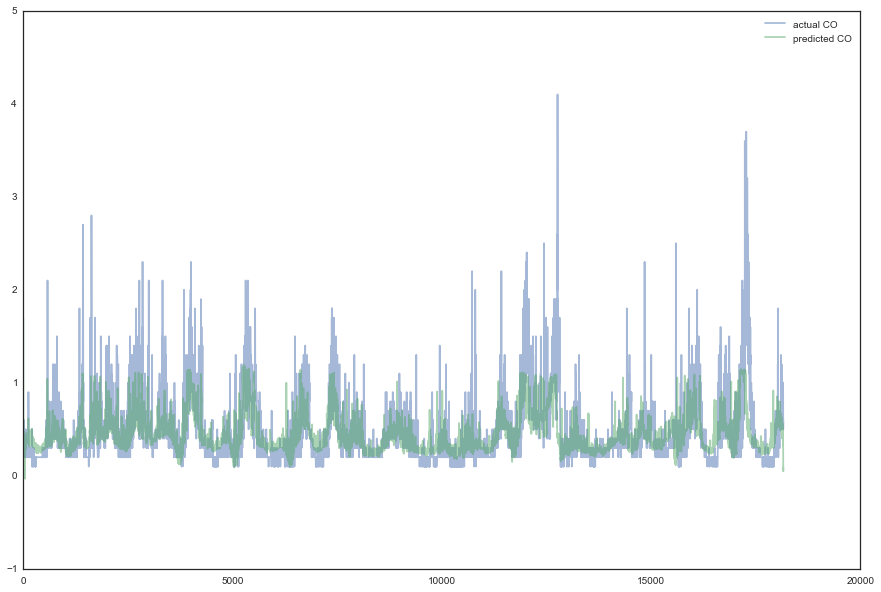

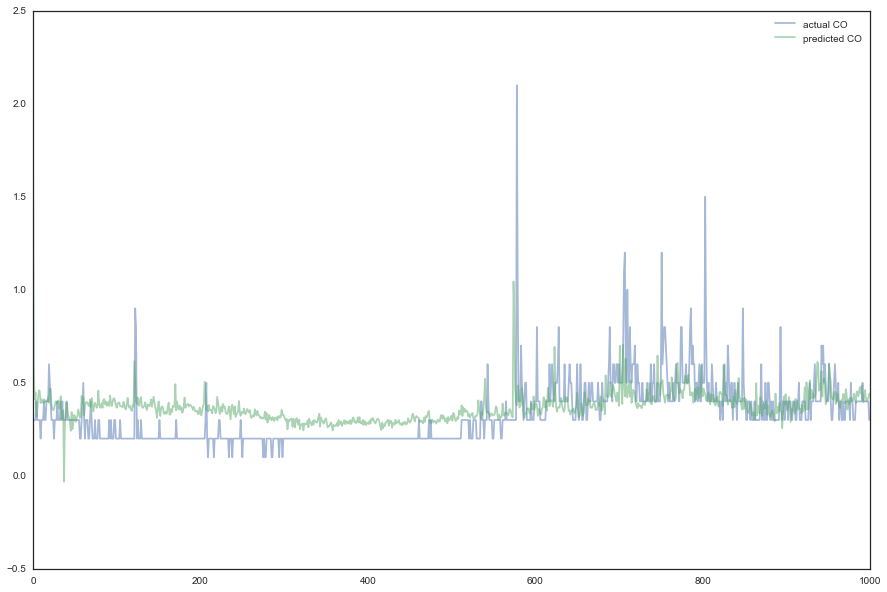

In [114]:
figure();
plot(y['CO-ppm'].as_matrix(), label='actual CO', alpha=0.5);
plot(ypred[:, 0], label='predicted CO', alpha=0.5);
legend(loc='best')
figure();
plot(y['CO-ppm'].as_matrix()[:1000], label='actual CO', alpha=0.5);
plot(ypred[:, 0][:1000], label='predicted CO', alpha=0.5);
legend(loc='best')
xlim(0, 1000);

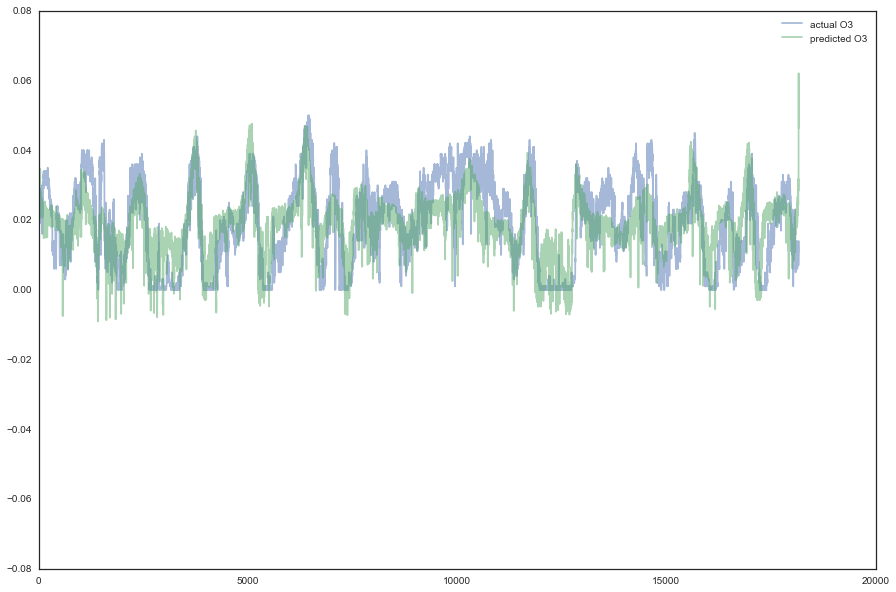

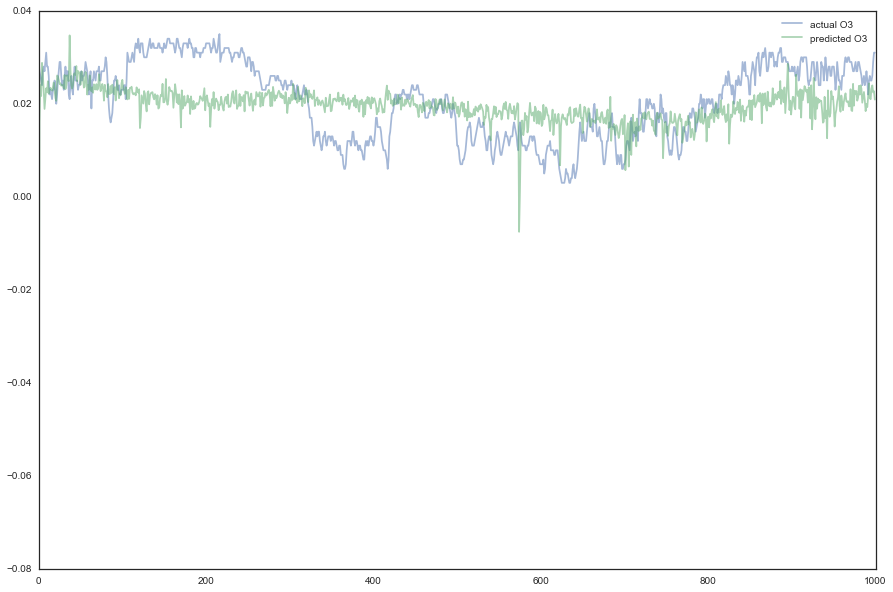

In [115]:
figure();
plot(y['O3-ppm'].as_matrix(), label='actual O3', alpha=0.5);
plot(ypred[:, 1], label='predicted O3', alpha=0.5);
legend(loc='best')
figure();
plot(y['O3-ppm'].as_matrix()[:1000], label='actual O3', alpha=0.5);
plot(ypred[:, 1][:1000], label='predicted O3', alpha=0.5);
legend(loc='best')
xlim(0, 1000);

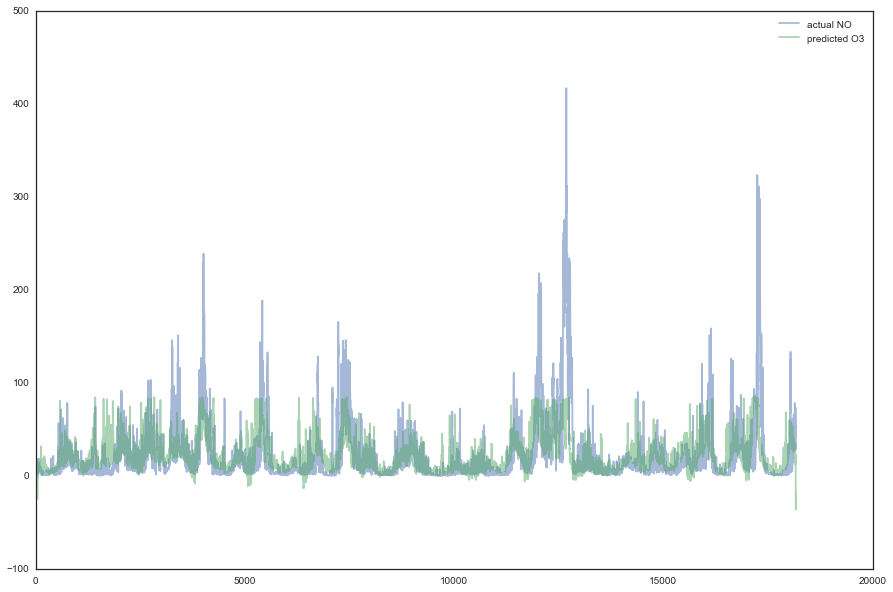

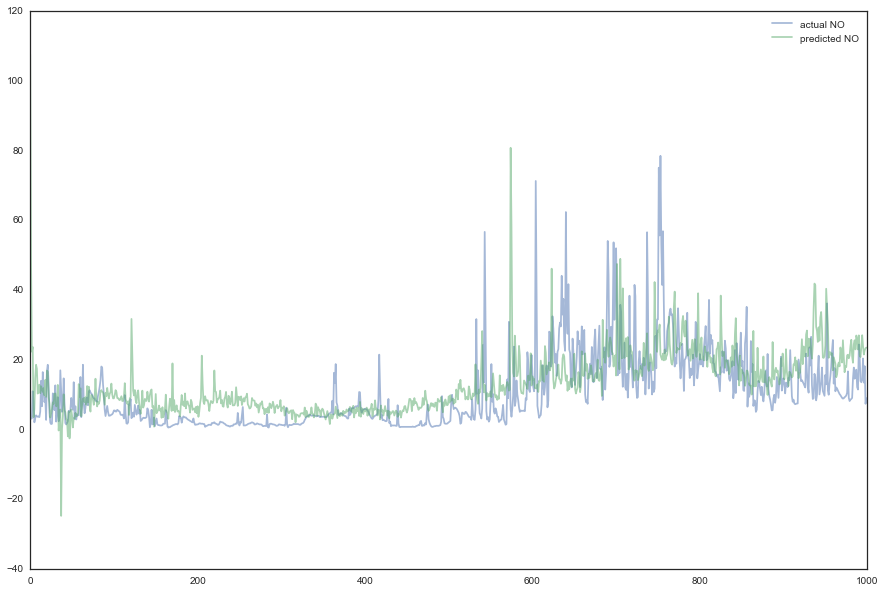

In [117]:
figure();
plot(y['NO-ppb'].as_matrix(), label='actual NO', alpha=0.5);
plot(ypred[:, 2], label='predicted O3', alpha=0.5);
legend(loc='best')
figure();
plot(y['NO-ppb'].as_matrix()[:1000], label='actual NO', alpha=0.5);
plot(ypred[:, 2][:1000], label='predicted NO', alpha=0.5);
legend(loc='best')
xlim(0, 1000);

In [ ]:
figure();
plot(y['NO-ppb'].as_matrix(), label='actual NO', alpha=0.5);
plot(ypred[:, 2], label='predicted O3', alpha=0.5);
legend(loc='best')
figure();
plot(y['NO-ppb'].as_matrix()[:1000], label='actual NO', alpha=0.5);
plot(ypred[:, 2][:1000], label='predicted NO', alpha=0.5);
legend(loc='best')
xlim(0, 1000);